In [1]:
import glob
import os
import json

# Initialize an empty list to store JSON data
all_data = []

# Get a list of all JSON files in the root directory
json_files = glob.glob('*.json')

# Iterate through each JSON file
for json_file in json_files:
    # Read JSON data from the file
    with open(json_file, 'r') as f:
        data = json.load(f)
        # Append the JSON data to the list
        all_data.append(data)

# Concatenate all JSON data into one variable
concatenated_data = {}
for data in all_data:
    concatenated_data.update(data)

# Display or save the concatenated JSON data
# print(concatenated_data)

# If you want to save the concatenated JSON data into a file
# with open('concatenated_data.json', 'w') as outfile:
#     json.dump(concatenated_data, outfile)


## preparing data
## splitting data by class type

In [3]:
import pandas as pd



# List of string variables to look for in the file names
search_strings = ["MATH", "SL",'CSCI','PSYC','CL','PS','LD','GEOL','DATA']  # Change this to the desired search strings

# Initialize data frames
stem_df = pd.DataFrame()
non_stem_df = pd.DataFrame()

# Iterate through the dictionary keys (filenames)
for filename, file_data in concatenated_data.items():
    # Check if any of the search strings are present in the filename
    if any(search_string in filename for search_string in search_strings):
        # Append data to STEM data frame
        stem_df = stem_df.append(pd.DataFrame(file_data))
    else:
        # Append data to non-STEM data frame
        non_stem_df = non_stem_df.append(pd.DataFrame(file_data))

# Print the data frames
print("STEM Data Frame:")
print(stem_df)
print("\nNon-STEM Data Frame:")
print(non_stem_df)


/var/folders/rw/__mb4wmn317bq6zqm1ftt10r0000gn/T/ipykernel_41989/162910301.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stem_df = stem_df.append(pd.DataFrame(file_data))
/var/folders/rw/__mb4wmn317bq6zqm1ftt10r0000gn/T/ipykernel_41989/162910301.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_stem_df = non_stem_df.append(pd.DataFrame(file_data))
/var/folders/rw/__mb4wmn317bq6zqm1ftt10r0000gn/T/ipykernel_41989/162910301.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_stem_df = non_stem_df.append(pd.DataFrame(file_data))
/var/folders/rw/__mb4wmn317bq6zqm1ftt10r0000gn/T/ipykernel_41989/162910301.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

STEM Data Frame:
      time [s/256]  breathing_rate [rpm](/api/datatype/33/)  \
0     4.350827e+11                                     14.0   
1     4.350827e+11                                     13.0   
2     4.350827e+11                                     13.0   
3     4.350827e+11                                     13.0   
4     4.350827e+11                                     13.0   
...            ...                                      ...   
2724  4.378474e+11                                     15.0   
2725  4.378474e+11                                     15.0   
2726  4.378474e+11                                     15.0   
2727  4.378474e+11                                     15.0   
2728  4.378474e+11                                     15.0   

      minute_ventilation [mL/min](/api/datatype/36/)  \
0                                            7290.72   
1                                            7290.72   
2                                            7290.72   
3 

/var/folders/rw/__mb4wmn317bq6zqm1ftt10r0000gn/T/ipykernel_41989/162910301.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_stem_df = non_stem_df.append(pd.DataFrame(file_data))
/var/folders/rw/__mb4wmn317bq6zqm1ftt10r0000gn/T/ipykernel_41989/162910301.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stem_df = stem_df.append(pd.DataFrame(file_data))
/var/folders/rw/__mb4wmn317bq6zqm1ftt10r0000gn/T/ipykernel_41989/162910301.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_stem_df = non_stem_df.append(pd.DataFrame(file_data))
/var/folders/rw/__mb4wmn317bq6zqm1ftt10r0000gn/T/ipykernel_41989/162910301.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

In [4]:
# List of columns to drop
columns_to_drop = [
    "axis 1",
    "axis 2",
    "axis 3",
    "steps",
    "lux",
    "inclinometer off",
    "inclinometer standing",
    "inclinometer sitting",
    "inclinometer lying"
]

# Drop specified columns from stem_df
stem_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Drop specified columns from non_stem_df
non_stem_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Drop rows with any NaN values from stem_df
stem_df.dropna(axis=0, how='any', inplace=True)

# Drop rows with any NaN values from non_stem_df
non_stem_df.dropna(axis=0, how='any', inplace=True)

# Save both data frames to CSV files
# stem_df.to_csv("stem_data.csv", index=False)
# non_stem_df.to_csv("non_stem_data.csv", index=False)

# Print the data frames
print("STEM Data Frame:")
print(stem_df)
print("\nNon-STEM Data Frame:")
print(non_stem_df)


STEM Data Frame:
      time [s/256]  breathing_rate [rpm](/api/datatype/33/)  \
0     4.350827e+11                                     14.0   
1     4.350827e+11                                     13.0   
2     4.350827e+11                                     13.0   
3     4.350827e+11                                     13.0   
4     4.350827e+11                                     13.0   
...            ...                                      ...   
4371  4.378515e+11                                     22.0   
4372  4.378515e+11                                     22.0   
4373  4.378515e+11                                     22.0   
4374  4.378515e+11                                     21.0   
4375  4.378515e+11                                     21.0   

      minute_ventilation [mL/min](/api/datatype/36/)  \
0                                            7290.72   
1                                            7290.72   
2                                            7290.72   
3 

In [5]:
# Define the new column names
new_column_names = {
    'time [s/256]': 'Time [s/256]',
    'breathing_rate [rpm](/api/datatype/33/)': 'Respiration Rate (rpm)',
    'minute_ventilation [mL/min](/api/datatype/36/)': 'Breathing Volume (liters/min)',
    'minute_ventilation_adjusted [mL/min](/api/datatype/38/)': 'Adjusted Breathing Volume (liters/min)',
    'activity [g](/api/datatype/49/)': 'Activity (g)',
    'heart_rate [bpm](/api/datatype/19/)': 'Heart Rate (bpm)',
    'Stress_Score': 'Stress Levels'
}

# Rename the columns in the combined_data DataFrame
stem_df.rename(columns=new_column_names, inplace=True)

# Print the DataFrame to verify the changes
print(stem_df.head())


   Time [s/256]  Respiration Rate (rpm)  Breathing Volume (liters/min)  \
0  4.350827e+11                    14.0                        7290.72   
1  4.350827e+11                    13.0                        7290.72   
2  4.350827e+11                    13.0                        7290.72   
3  4.350827e+11                    13.0                        7290.72   
4  4.350827e+11                    13.0                        7290.72   

   Adjusted Breathing Volume (liters/min)  Activity (g)  Heart Rate (bpm)  \
0                             6525.959161      0.027344              98.0   
1                             6525.959161      0.050781              98.0   
2                             6525.959161      0.046875              99.0   
3                             6525.959161      0.015625             100.0   
4                             6525.959161      0.000000             102.0   

   Stress Levels  
0            0.0  
1            0.0  
2            0.0  
3            0.0

In [6]:
# Divide the columns by 1000 to convert mL to liters
stem_df['Breathing Volume (liters/min)'] /= 1000
stem_df['Adjusted Breathing Volume (liters/min)'] /= 1000

# Print the modified DataFrame to verify the changes
print(stem_df[['Breathing Volume (liters/min)', 'Adjusted Breathing Volume (liters/min)']].head())


   Breathing Volume (liters/min)  Adjusted Breathing Volume (liters/min)
0                        7.29072                                6.525959
1                        7.29072                                6.525959
2                        7.29072                                6.525959
3                        7.29072                                6.525959
4                        7.29072                                6.525959


In [7]:
# Define the new column names
new_column_names = {
    'time [s/256]': 'Time [s/256]',
    'breathing_rate [rpm](/api/datatype/33/)': 'Respiration Rate (rpm)',
    'minute_ventilation [mL/min](/api/datatype/36/)': 'Breathing Volume (liters/min)',
    'minute_ventilation_adjusted [mL/min](/api/datatype/38/)': 'Adjusted Breathing Volume (liters/min)',
    'activity [g](/api/datatype/49/)': 'Activity (g)',
    'heart_rate [bpm](/api/datatype/19/)': 'Heart Rate (bpm)',
    'Stress_Score': 'Stress Levels'
}

# Rename the columns in the combined_data DataFrame
non_stem_df.rename(columns=new_column_names, inplace=True)

# Print the DataFrame to verify the changes
print(non_stem_df.head())


   Time [s/256]  Respiration Rate (rpm)  Breathing Volume (liters/min)  \
0  4.350420e+11                    18.0                       13306.56   
1  4.350420e+11                    18.0                       12815.20   
2  4.350420e+11                    18.0                       12815.20   
3  4.350420e+11                    18.0                       12815.20   
4  4.350420e+11                    18.0                       12549.60   

   Adjusted Breathing Volume (liters/min)  Activity (g)  Heart Rate (bpm)  \
0                            11910.766993      0.000000              81.0   
1                            11470.948252      0.000000              80.0   
2                            11470.948252      0.000000              80.0   
3                            11470.948252      0.015625              80.0   
4                            11233.208392      0.000000              80.0   

   Stress Levels  
0            0.0  
1            0.0  
2            0.0  
3            0.0

In [8]:
# Divide the columns by 1000 to convert mL to liters
non_stem_df['Breathing Volume (liters/min)'] /= 1000
non_stem_df['Adjusted Breathing Volume (liters/min)'] /= 1000

# Print the modified DataFrame to verify the changes
print(non_stem_df[['Breathing Volume (liters/min)', 'Adjusted Breathing Volume (liters/min)']].head())


   Breathing Volume (liters/min)  Adjusted Breathing Volume (liters/min)
0                       13.30656                               11.910767
1                       12.81520                               11.470948
2                       12.81520                               11.470948
3                       12.81520                               11.470948
4                       12.54960                               11.233208


## showing difference in feature importance between STEM and NONSTEM data

Accuracy on non_stem_df test data: 0.636466993533717
Accuracy on stem_df test data: 0.5753712673657316


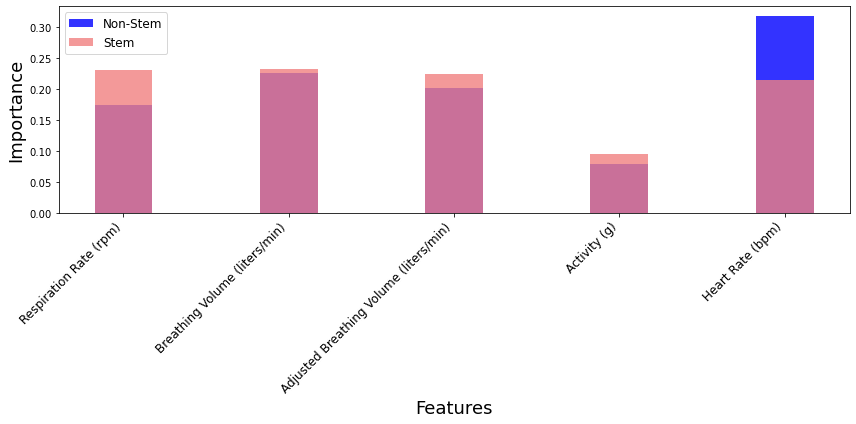

In [12]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from scipy import stats

# source_directory = "/Users//Desktop/Final Files 04-06-24/final-hexo-04-06-24/modified files"

# # Load stem and non_stem DataFrames
# stem_df = pd.read_csv(os.path.join(source_directory, '12-8-24-MATH101-John.csv'))
# non_stem_df = pd.read_csv(os.path.join(source_directory, '12-8-23-HIST250-Dylan.csv'))

# Drop columns with 'Time' in their names
stem_df = stem_df.drop(stem_df.filter(like='Time').columns, axis=1)
non_stem_df = non_stem_df.drop(non_stem_df.filter(like='Time').columns, axis=1)

# Remove NaN values
non_stem_df.dropna(inplace=True)
stem_df.dropna(inplace=True)

# Prepare non_stem data for training
X_non_stem = non_stem_df.drop(columns=['Stress Levels'])
y_non_stem = non_stem_df['Stress Levels']

# Remove outliers using Z-score method for non_stem data
z_scores_non_stem = stats.zscore(X_non_stem)
filtered_entries_non_stem = (z_scores_non_stem < 3).all(axis=1)
X_non_stem = X_non_stem[filtered_entries_non_stem]
y_non_stem = y_non_stem[filtered_entries_non_stem]

# Undersample the "0" stress levels to match the number of "1" stress levels
rus_non_stem = RandomUnderSampler()
X_non_stem_resampled, y_non_stem_resampled = rus_non_stem.fit_resample(X_non_stem, y_non_stem)

# Splitting data into train and test sets for non_stem data
X_non_stem_train, X_non_stem_test, y_non_stem_train, y_non_stem_test = train_test_split(
    X_non_stem_resampled, y_non_stem_resampled, stratify=y_non_stem_resampled, random_state=42
)

# Scale the data for non_stem data
scaler_non_stem = StandardScaler()
X_non_stem_train_scaled = scaler_non_stem.fit_transform(X_non_stem_train)
X_non_stem_test_scaled = scaler_non_stem.transform(X_non_stem_test)

# Train the XGBoost model on non_stem data
xgb_non_stem = XGBClassifier()
xgb_non_stem.fit(X_non_stem_train_scaled, y_non_stem_train)

# Print accuracy on test data for non_stem data
y_non_stem_pred = xgb_non_stem.predict(X_non_stem_test_scaled)
accuracy_non_stem = accuracy_score(y_non_stem_test, y_non_stem_pred)
print("Accuracy on non_stem_df test data:", accuracy_non_stem)

# Get feature importances for non_stem data
feature_importance_non_stem = xgb_non_stem.feature_importances_

# Prepare stem data for training
X_stem = stem_df.drop(columns=['Stress Levels'])
y_stem = stem_df['Stress Levels']

# Remove outliers using Z-score method for stem data
z_scores_stem = stats.zscore(X_stem)
filtered_entries_stem = (z_scores_stem < 3).all(axis=1)
X_stem = X_stem[filtered_entries_stem]
y_stem = y_stem[filtered_entries_stem]

# Undersample the "0" stress levels to match the number of "1" stress levels for stem data
rus_stem = RandomUnderSampler()
X_stem_resampled, y_stem_resampled = rus_stem.fit_resample(X_stem, y_stem)

# Splitting data into train and test sets for stem data
X_stem_train, X_stem_test, y_stem_train, y_stem_test = train_test_split(
    X_stem_resampled, y_stem_resampled, stratify=y_stem_resampled, random_state=42
)

# Scale the data for stem data
scaler_stem = StandardScaler()
X_stem_train_scaled = scaler_stem.fit_transform(X_stem_train)
X_stem_test_scaled = scaler_stem.transform(X_stem_test)

# Train the XGBoost model on stem data
xgb_stem = XGBClassifier()
xgb_stem.fit(X_stem_train_scaled, y_stem_train)

# Print accuracy on test data for stem data
y_stem_pred = xgb_stem.predict(X_stem_test_scaled)
accuracy_stem = accuracy_score(y_stem_test, y_stem_pred)
print("Accuracy on stem_df test data:", accuracy_stem)

# Get feature importances for stem data
feature_importance_stem = xgb_stem.feature_importances_

# Plotting the feature importance comparison
plt.figure(figsize=(12, 6))

bar_width = 0.35  # Width of each bar
index = range(len(X_non_stem.columns))

plt.bar(index, feature_importance_non_stem, bar_width, color='blue', alpha=0.8, label='Non-Stem')
plt.bar(index, feature_importance_stem, bar_width, color='lightcoral', alpha=0.8, label='Stem')

plt.xlabel('Features', fontsize=18)
plt.ylabel('Importance', fontsize=18)
plt.xticks(index, X_non_stem.columns, rotation=45, ha='right', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


## experimenting with graphs

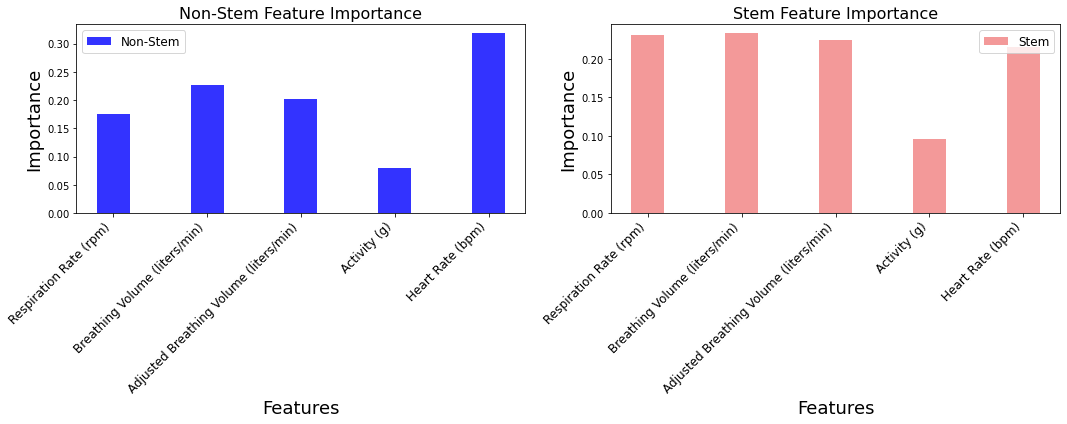

In [14]:
import numpy as np
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Bar width and index
bar_width = 0.35
index = np.arange(len(X_non_stem.columns))

# Plotting for non_stem DataFrame
axs[0].bar(index, feature_importance_non_stem, bar_width, color='blue', alpha=0.8, label='Non-Stem')
axs[0].set_xlabel('Features', fontsize=18)
axs[0].set_ylabel('Importance', fontsize=18)
axs[0].set_xticks(index)
axs[0].set_xticklabels(X_non_stem.columns, rotation=45, ha='right', fontsize=12)
axs[0].set_title('Non-Stem Feature Importance', fontsize=16)
axs[0].legend(fontsize=12)

# Plotting for stem DataFrame
axs[1].bar(index, feature_importance_stem, bar_width, color='lightcoral', alpha=0.8, label='Stem')
axs[1].set_xlabel('Features', fontsize=18)
axs[1].set_ylabel('Importance', fontsize=18)
axs[1].set_xticks(index)
axs[1].set_xticklabels(X_non_stem.columns, rotation=45, ha='right', fontsize=12)
axs[1].set_title('Stem Feature Importance', fontsize=16)
axs[1].legend(fontsize=12)

plt.tight_layout()
plt.show()